In [164]:
%matplotlib inline

import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
import gc
import matplotlib.pyplot as plt
import seaborn as sb
from fastai.imports import *
# from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import missingno as msno
from sklearn.model_selection import train_test_split
import statistics
from imblearn.over_sampling import SMOTE
import numpy as np

In [165]:
df = pd.read_csv('bank-marketing/bank-additional-full.csv', sep=';')
# df['id'] = df.index + 1

In [166]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [167]:
df.shape

(41188, 21)

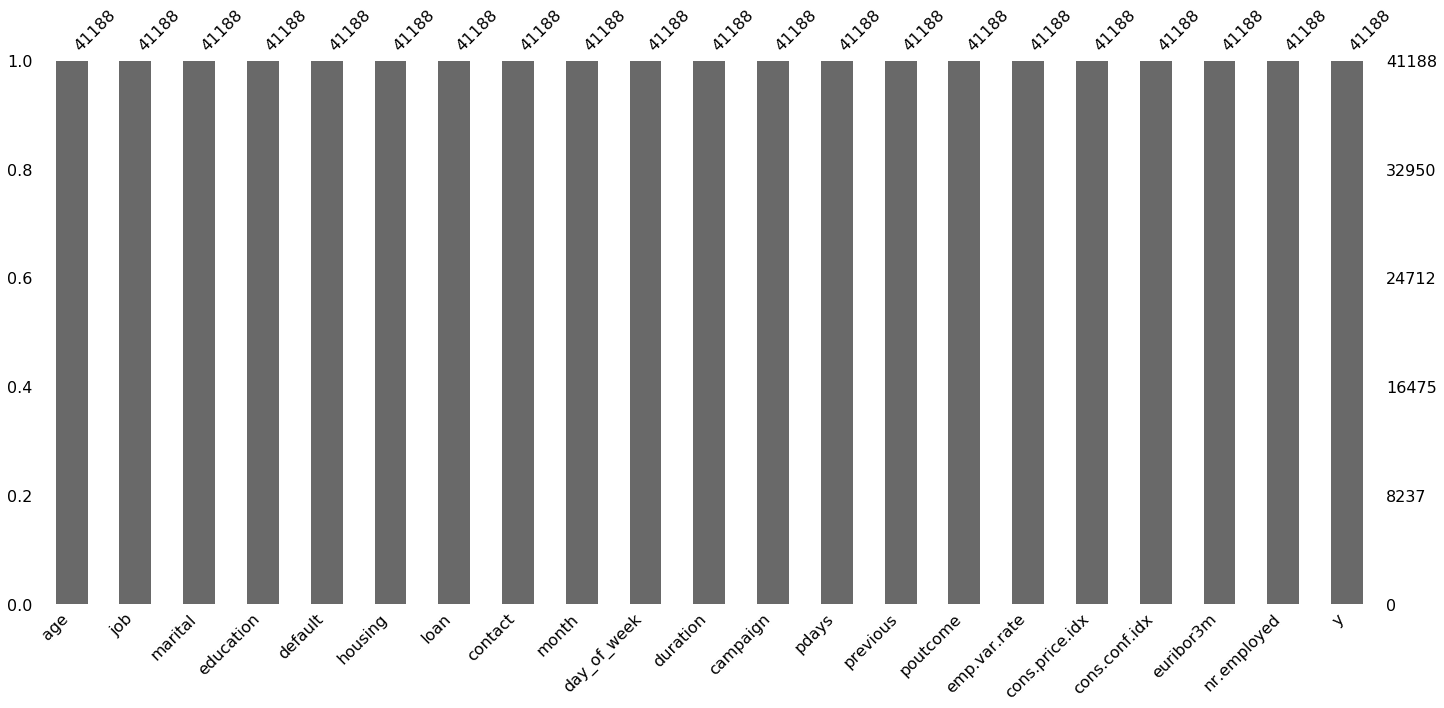

In [168]:
msno.bar(df)

In [169]:
# Split into predictor and response dataframes.

X_df = df.drop('y', axis=1)
y = df['y']

X_df.shape,y.shape

((41188, 20), (41188,))

In [170]:
# Map response variable to integers 0,1.

y = pd.Series(np.where(y.values == 'yes',1,0), y.index)

In [171]:
y.value_counts()

0    36548
1     4640
dtype: int64

In [172]:
# Separating with continuous and categorical variables.

X_cont = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
X_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

cont_df = X_df[X_cont]
cat_df = X_df[X_cat]

In [173]:
# Converting categorical features to numerical values.

cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [174]:
# Initial numeric dataframe

X_df = cont_df.join(pd.get_dummies(cat_df))

In [175]:
X_df.shape

(41188, 61)

In [176]:
X_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [177]:
# Split into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 61), (12357, 61), (28831,), (12357,))

In [178]:
# Initial logistic regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.001)
model_base = clf.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [179]:
y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

0.8963340616654528

In [180]:
metrics.confusion_matrix(y_test, y_pred)
# print(metrics.classification_report(y_test, y_pred))

array([[10813,   122],
       [ 1159,   263]])

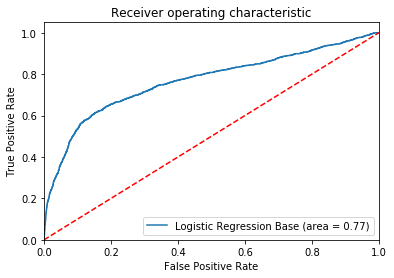

In [181]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, model_base.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_base.predict_proba(X_test)[:,1])
# plt.figure()

probs = model_base.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [182]:
df.apply(lambda x: len(x.unique()), axis=0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [183]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [184]:
# Label Encode instead of dummy variables

mappings = []

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_df = df.drop('y', axis=1)
for i, col in enumerate(label_df):
    if label_df[col].dtype == 'object':
        label_df[col] = label_encoder.fit_transform(np.array(label_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

In [185]:
X_train, X_test, y_train, y_test = train_test_split(label_df, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 20), (12357, 20), (28831,), (12357,))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9066925629198025


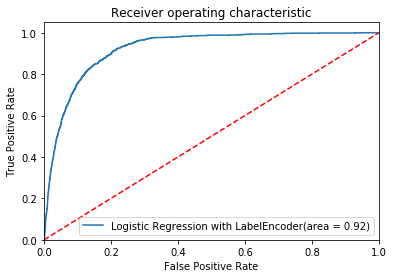

In [186]:
clf = LogisticRegression()
model_label = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print(model_label.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

probs = model_label.predict_proba(X_test)
preds = probs[:,1]
labelfpr, labeltpr, labelthreshold = metrics.roc_curve(y_test, preds)
label_roc_auc = metrics.auc(labelfpr, labeltpr)

plt.figure()
plt.plot(labelfpr, labeltpr, label='Logistic Regression with LabelEncoder(area = %0.2f)' % label_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [187]:
mappings

[{'admin.': 1,
  'blue-collar': 2,
  'entrepreneur': 3,
  'housemaid': 4,
  'management': 5,
  'retired': 6,
  'self-employed': 7,
  'services': 8,
  'student': 9,
  'technician': 10,
  'unemployed': 11,
  'unknown': 12},
 {'divorced': 1, 'married': 2, 'single': 3, 'unknown': 4},
 {'basic.4y': 1,
  'basic.6y': 2,
  'basic.9y': 3,
  'high.school': 4,
  'illiterate': 5,
  'professional.course': 6,
  'university.degree': 7,
  'unknown': 8},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'cellular': 1, 'telephone': 2},
 {'apr': 1,
  'aug': 2,
  'dec': 3,
  'jul': 4,
  'jun': 5,
  'mar': 6,
  'may': 7,
  'nov': 8,
  'oct': 9,
  'sep': 10},
 {'fri': 1, 'mon': 2, 'thu': 3, 'tue': 4, 'wed': 5},
 {'failure': 1, 'nonexistent': 2, 'success': 3}]

In [188]:
educ_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

In [189]:
mappings2 = []

# using cat.codes for order, one hot for high cardinality and weak case of cardinality.

def ordered_labels(df, col, order):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.reorder_categories(order, ordered=True)
    df[col] = df[col].cat.codes.astype(int)

label_df_2 = df.drop('y', axis=1)

# Use dummy variables for occupation
label_df_2 = pd.concat([label_df_2, pd.get_dummies(label_df_2['job'])],axis=1).drop('job',axis=1)

# Use ordered cat.codes for days, months, and education
ordered_labels(label_df_2, 'education', educ_order)
ordered_labels(label_df_2, 'month', month_order)
ordered_labels(label_df_2, 'day_of_week', day_order)

# Same label encoding for rest since low cardinality
for i, col in enumerate(label_df_2):
    if label_df_2[col].dtype == 'object':
        label_df_2[col] = label_encoder.fit_transform(np.array(label_df_2[col].astype(str)).reshape((-1,)))
        mappings2.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

label_df_2.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,56,1,2,0,0,0,1,2,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0
1,57,1,5,1,0,0,1,2,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0
2,37,1,5,0,2,0,1,2,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0
3,40,1,3,0,0,0,1,2,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0
4,56,1,5,0,0,2,1,2,0,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9065307113377034


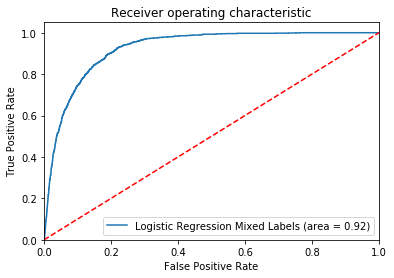

In [190]:
X_train, X_test, y_train, y_test = train_test_split(label_df_2, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

clf = LogisticRegression()
model_mix = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print(model_mix.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

probs = model_mix.predict_proba(X_test)
preds = probs[:,1]
mixfpr, mixtpr, mixthreshold = metrics.roc_curve(y_test, preds)
mix_roc_auc = metrics.auc(mixfpr, mixtpr)

plt.figure()
plt.plot(mixfpr, mixtpr, label='Logistic Regression Mixed Labels (area = %0.2f)' % mix_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [191]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 31), (12357, 31), (28831,), (12357,))

## Feature Importance

In [192]:
# Feature importance rankings.

weights = zip(label_df_2.columns, model_mix.coef_[0])
ranked_weights = sorted(weights, key=lambda x: x[1], reverse = True)

In [193]:
# Top 10 positive feature importance

ranked_weights[:10]

[('cons.price.idx', 0.3297568956653441),
 ('poutcome', 0.26552042408360876),
 ('retired', 0.1321899710892219),
 ('marital', 0.12345460697525316),
 ('admin.', 0.11097671690983003),
 ('student', 0.0897616372353354),
 ('technician', 0.05150924514911821),
 ('cons.conf.idx', 0.033826132286412736),
 ('education', 0.02786375068100711),
 ('month', 0.026661201452631664)]

In [194]:
# Top 10 negative feature importance

ranked_weights[-10:]

[('campaign', -0.023341474157777174),
 ('loan', -0.02636180811322598),
 ('management', -0.04223966595785695),
 ('services', -0.12679888249960877),
 ('euribor3m', -0.15559445746894013),
 ('previous', -0.19404001344611582),
 ('default', -0.22566905645489238),
 ('blue-collar', -0.22947680002332954),
 ('emp.var.rate', -0.3107808238406209),
 ('contact', -0.36138643021532096)]

In [195]:
abs_weights = zip(label_df_2.columns, model_mix.coef_[0]) 
abs_ranked_weights = sorted(abs_weights, key=lambda x: abs(x[1]), reverse = True)
abs_ranked_weights[:10]

[('contact', -0.36138643021532096),
 ('cons.price.idx', 0.3297568956653441),
 ('emp.var.rate', -0.3107808238406209),
 ('poutcome', 0.26552042408360876),
 ('blue-collar', -0.22947680002332954),
 ('default', -0.22566905645489238),
 ('previous', -0.19404001344611582),
 ('euribor3m', -0.15559445746894013),
 ('retired', 0.1321899710892219),
 ('services', -0.12679888249960877)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

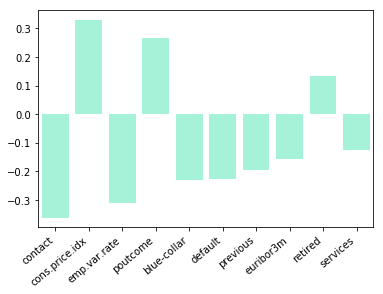

In [196]:
# Absolute value feature importance plot

labels, weights = zip(*abs_ranked_weights[:10])
sb.barplot(x = pd.Series(labels), y = pd.Series(weights), color='aquamarine', alpha=0.8)
plt.xticks(rotation=40, ha='right')

In [197]:
# Pairplot to look at distributions.

# sb.pairplot(cont_df)

## Feature engineering

In [198]:
X_df_2 = label_df_2.copy()

In [199]:
# Creating binary variable for whether there was previous contact.

X_df_2[(X_df_2['previous'] == 0) & (X_df_2['pdays'] != 999)]

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown


In [200]:
X_df_2['previous_contact'] = np.where(X_df_2['pdays'] == 999, 0, 1)

# X_df_2 = X_df_2.drop('pdays', axis = 1)

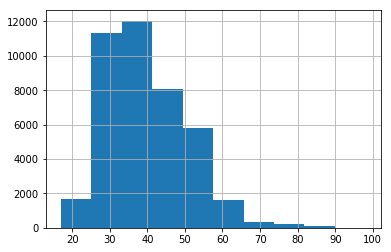

In [201]:
X_df_2['age'].hist()

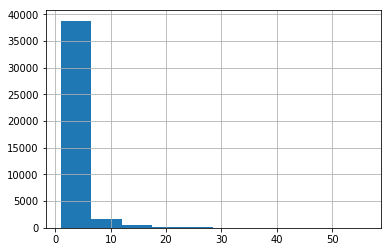

In [202]:
X_df_2['campaign'].hist()

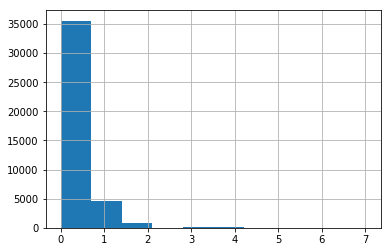

In [203]:
X_df_2['previous'].hist()

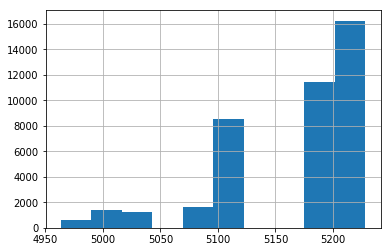

In [204]:
X_df_2['nr.employed'].hist()

In [219]:
def bins5(df, col):
    df[col] = pd.cut(df[col], 5, labels=range(5)).astype(int)

In [220]:
bins5(X_df_2, 'age')
bins5(X_df_2, 'campaign')
bins5(X_df_2, 'previous')
bins5(X_df_2, 'nr.employed')

In [207]:
# SMOTE for rebalancing

y.value_counts()[1]/y.value_counts().sum()

0.11265417111780131

In [208]:
# Threshold setting for coefficient size.

coef_thresh = np.percentile(abs(model_mix.coef_[0]), 10)
coef_thresh

0.005724413883772386

In [209]:
# Features with very low coefficients that do not contribute much to the model.

low_coefs = [feature[0] for feature in abs_ranked_weights if abs(feature[1]) < coef_thresh]
low_coefs

['duration', 'entrepreneur', 'pdays']

In [210]:
# Drop low importance features

# X_df_2 = X_df_2.drop(columns = low_coefs)
X_df_2.shape

(41188, 32)

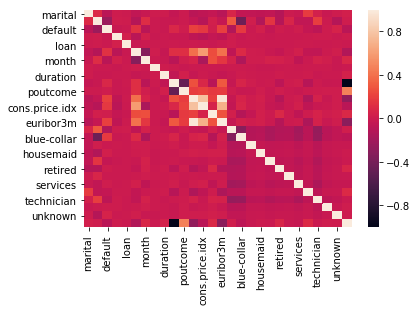

In [211]:
sb.heatmap(X_df_2.corr())

In [212]:
# Highly correlated features

corr_mat = X_df_2.corr()
half_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
half_corr_mat.head()

,marital,education,default,housing,loan,contact,month,day_of_week,duration,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,previous_contact
marital,NaN,0.101376,-0.079450,0.010467,0.005788,-0.054501,-0.018653,0.014472,0.010290,-0.037942,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,0.075428,-0.045265,-0.047839,-0.055181,-0.051110,-0.108069,0.002293,-0.009286,0.184116,0.040090,-0.009826,0.009834,0.037973
education,NaN,NaN,-0.218989,0.020847,0.011312,-0.108651,0.115857,-0.004091,-0.015618,-0.021797,0.005603,-0.038992,-0.096554,0.038230,-0.030160,0.297503,-0.443976,0.026201,-0.119471,0.154868,-0.106842,0.074657,-0.051706,-0.053444,0.189820,0.003098,-0.109193,0.021739
default,NaN,NaN,NaN,-0.015815,-0.003782,0.135238,-0.084322,-0.004286,-0.011794,0.080062,0.023417,0.203263,0.168073,0.026522,0.195336,-0.121372,0.176382,-0.001008,0.036796,-0.035507,0.010070,-0.004843,0.017599,-0.032609,-0.069124,0.010481,0.055630,-0.080066
housing,NaN,NaN,NaN,NaN,0.044296,-0.082186,0.031865,-0.009003,-0.007658,-0.010551,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,0.009949,-0.015214,0.004480,-0.004205,-0.007936,-0.001892,-0.000393,-0.004397,0.004656,0.010149,0.008631,-0.001290,0.010518
loan,NaN,NaN,NaN,NaN,NaN,-0.008556,-0.004193,0.002386,-0.000916,0.000345,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.018103,-0.004662,-0.005220,-0.002134,-0.001096,-0.006570,-0.006484,0.000392,0.004771,-0.007511,-0.001518,0.004121,-0.000365


In [213]:
[col for col in half_corr_mat if any(half_corr_mat[col] > 0.9)]

['euribor3m']

In [214]:
# X_df_2 = X_df_2.drop('euribor3m', axis=1)

In [218]:
X_df_2.dtypes

age                 category
marital                int64
education              int64
default                int64
housing                int64
loan                   int64
contact                int64
month                  int64
day_of_week            int64
duration               int64
campaign            category
pdays                  int64
previous            category
poutcome               int64
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed         category
admin.                 uint8
blue-collar            uint8
entrepreneur           uint8
housemaid              uint8
management             uint8
retired                uint8
self-employed          uint8
services               uint8
student                uint8
technician             uint8
unemployed             uint8
unknown                uint8
previous_contact       int64
dtype: object

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 32), (12357, 32), (28831,), (12357,))

In [216]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

TypeError: data type not understood

In [ ]:
clf = LogisticRegression()
model_norm = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print(model_norm.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

probs = model_norm.predict_proba(X_test)
preds = probs[:,1]
normfpr, normtpr, normthreshold = metrics.roc_curve(y_test, preds)
norm_roc_auc = metrics.auc(normfpr, normtpr)

plt.figure()
plt.plot(normfpr, normtpr, label='Logistic Regression (area = %0.2f)' % norm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [ ]:
clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)
print(model_res.score(X_test, y_test))

In [ ]:
probs = model_res.predict_proba(X_test)
preds = probs[:,1]
resfpr, restpr, resthreshold = metrics.roc_curve(y_test, preds)
res_roc_auc = metrics.auc(resfpr, restpr)

plt.figure()
plt.plot(resfpr, restpr, label='Logistic Regression (area = %0.2f)' % res_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
norm_roc_auc, res_roc_auc

In [ ]:
# Statistical logistic model

import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary(xname=list(X_df_2.columns)))

In [ ]:
# Polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly_feats = poly.fit(X_df_2)
poly_feats_train = poly_feats.transform(X_df_2)

poly_feats

In [ ]:
poly_feats.get_feature_names(input_features=X_df_2.columns)

In [ ]:
poly_feats_train.head()

## Random Forest Implementation

In [ ]:

cross_val_score(logit_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()